In [22]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, binom, kv
import math

def calculate_outage_probability(Ptdb, ma, Na, mb, K):
    Pt = 10 ** (Ptdb / 10)
    Pa = Pb = Pr = Pt / 3
    R1 = 1
    R2 = 0.5
    gammath1 = 2 ** (2 * R1) - 1
    psith1 = gammath1 * (Pb + Pr) / Pr
    d = 0.5
    omegaa = d ** (-4)
    omegab = (1 - d) ** (-4)
    gamma1a = Pa * omegaa
    gamma1b = (Pb + Pr) * omegab

    def b(r, p):
        if r == 0:
            return 1
        elif r == 1:
            return p * (mb / gamma1b)
        else:
            sum_val = 0
            for i in range(1, min(r, mb - 1) + 1):
                term = (i * p - r + i) * (1 / math.factorial(i)) * ((mb / gamma1b) ** i) * b(r - i, p)
                sum_val += term
            return (1 / r) * sum_val

    sum_p = 0
    for p in range(0, K):
        sum_r = 0
        for r in range(0, p * (mb - 1) + 1):
            inner_sum_m = 0
            for m in range(0, ma * Na):
                inner_sum_j = 0
                G = (mb * (1 + p) * psith1 / gamma1b) + (ma * psith1 / gamma1a)
                for j in range(0, mb + r):
                    inner_sum_i = 0
                    for i in range(0, m + 1):
                        bessel_k_value = kv(j - i + 1, 2 * np.sqrt((ma * mb * ((psith1)** 2)*(p + 1)) / (gamma1a * gamma1b)))
                        inner_sum_i += binom(m, i) * (psith1 ** i) * 2 * ((((gamma1b * ma * (psith1 ** 2)) / (gamma1a * mb * (p + 1)))) ** ((j - i + 1) / 2)) * bessel_k_value
                    inner_sum_j += binom(mb + r - 1, j) * (psith1 ** (mb + r - 1 - j)) * inner_sum_i
                inner_sum_m += (1 / math.factorial(m)) * ((ma * psith1 / gamma1a) ** m ) * np.exp(-G) * inner_sum_j
            term1 = gamma(mb + r) - ((mb * (p + 1) / gamma1b) ** (mb + r)) * inner_sum_m
            sum_r += b(r, p) * ((gamma1b / (mb * (p + 1))) ** (mb + r)) * term1
        sum_p += binom(K - 1, p) * ((-1) ** p) * sum_r

    Pout = (K / gamma(mb)) * ((mb / gamma1b) ** mb) * sum_p
    return Pout


In [23]:
calculate_outage_probability(20, 2, 10, 2, 10)

8.599720935364984e-14

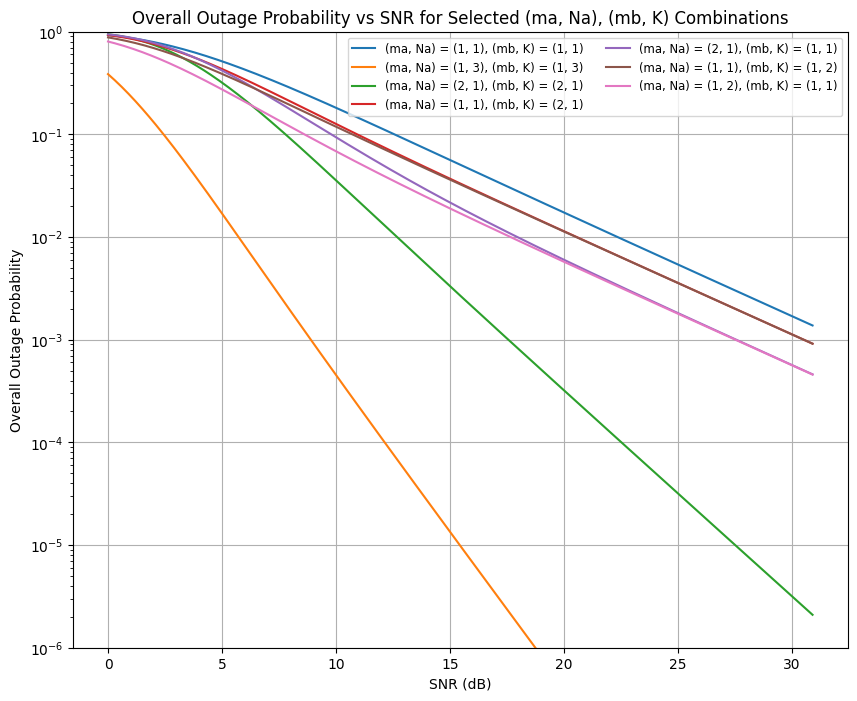

In [24]:
import numpy as np
import pandas as pd
from scipy.special import gamma
import matplotlib.pyplot as plt



# Set up the range for Ptdb, Na, K, ma, mb
ptdb_range = np.arange(0, 31, 0.1)
Na_range = np.arange(1, 4)
K_range = np.arange(1, 4)
ma_range = np.arange(1, 4)
mb_range = np.arange(1, 4)

# Iterate over all combinations of Ptdb, Na, K, ma, and mb
results = []

for Ptdb in ptdb_range:
    for Na in Na_range:
        for K in K_range:
            for ma in ma_range:
                for mb in mb_range:
                    # Calculate Pout
                    Pout = calculate_outage_probability(Ptdb, ma, Na, mb, K)

                    # Store the results in a list
                    results.append((Ptdb, Na, K, ma, mb, Pout))

# Convert the results into a DataFrame
df = pd.DataFrame(results, columns=['Ptdb', 'Na', 'K', 'ma', 'mb', 'Pout'])

plot_combinations = [
    (1, 1, 1, 1),
    (1, 3, 1, 3),
    (2, 1, 2, 1),
    (1, 1, 2, 1),
    (2, 1, 1, 1),
    (1, 1, 1, 2),
    (1, 2, 1, 1)
]

# Plotting
plt.figure(figsize=(10, 8))

# Plot for the specified combinations
for ma, Na, mb, K in plot_combinations:
    subset = df[(df['Na'] == Na) & (df['K'] == K) & (df['ma'] == ma) & (df['mb'] == mb)]
    plt.plot(subset['Ptdb'], subset['Pout'], label=f'(ma, Na) = ({ma}, {Na}), (mb, K) = ({mb}, {K})')

# Customize the plot
plt.xlabel('SNR (dB)')
plt.ylabel('Overall Outage Probability')
plt.title('Overall Outage Probability vs SNR for Selected (ma, Na), (mb, K) Combinations')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.ylim(1e-6, 1)  # Set the y-axis limits
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)

# Show the plot
plt.show()


In [25]:
ptdb_values = np.arange(0, 31, 5)

for ptdb in ptdb_values:
    print(calculate_outage_probability(ptdb, 1, 1, 1, 2))

0.8805569487584199
0.38853627283438175
0.11880207155760046
0.03621710220152375
0.011310444583664815
0.0035633632985173636
0.0011255686161065757


In [26]:
data = df
df.head(), data.tail()

(   Ptdb  Na  K  ma  mb      Pout
 0   0.0   1  1   1   1  0.928277
 1   0.0   1  1   1   2  0.926571
 2   0.0   1  1   1   3  0.926544
 3   0.0   1  1   2   1  0.942775
 4   0.0   1  1   2   2  0.945432,
        Ptdb  Na  K  ma  mb          Pout
 25105  30.9   3  3   2   2 -1.702342e-15
 25106  30.9   3  3   2   3 -1.118485e-15
 25107  30.9   3  3   3   1  9.561463e-11
 25108  30.9   3  3   3   2 -6.167909e-17
 25109  30.9   3  3   3   3 -1.341786e-15)

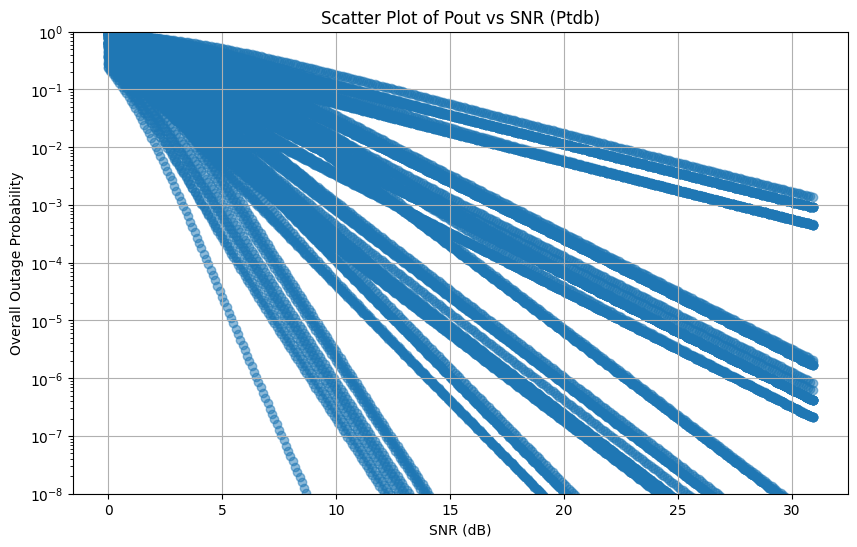

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Ptdb'], data['Pout'], alpha=0.5)
plt.xlabel('SNR (dB)')
plt.ylabel('Overall Outage Probability')
plt.title('Scatter Plot of Pout vs SNR (Ptdb)')
plt.yscale('log')
plt.ylim(1e-8, 1) # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()


In [28]:
# removed negative cases
data = data[data['Pout']>0]

count_greater_than_1 = (data['Pout'] <=0).sum()

# Print the result
print(f"Number of values less than 0: {count_greater_than_1}")

data

Number of values less than 0: 0


,Ptdb,Na,K,ma,mb,Pout
0,0.0,1,1,1,1,9.282768e-01
1,0.0,1,1,1,2,9.265710e-01
2,0.0,1,1,1,3,9.265436e-01
3,0.0,1,1,2,1,9.427752e-01
4,0.0,1,1,2,2,9.454325e-01
...,...,...,...,...,...,...
25101,30.9,3,3,1,1,2.231496e-10
25102,30.9,3,3,1,2,1.274892e-10
25103,30.9,3,3,1,3,1.274904e-10
25104,30.9,3,3,2,1,9.561951e-11


In [29]:
X = data[['Ptdb', 'Na', 'K', 'ma', 'mb']].values  # Feature: SNR values
y = np.log(data['Pout'].values)  # Log-scaled target: log(Pout) values
print(X, y)


[[ 0.   1.   1.   1.   1. ]
 [ 0.   1.   1.   1.   2. ]
 [ 0.   1.   1.   1.   3. ]
 ...
 [30.9  3.   3.   1.   3. ]
 [30.9  3.   3.   2.   1. ]
 [30.9  3.   3.   3.   1. ]] [ -0.07442527  -0.07626456  -0.07629413 ... -22.78297995 -23.07064421
 -23.0706953 ]


[[ 0.   1.   1.   1.   1. ]
 [ 0.   1.   1.   1.   2. ]
 [ 0.   1.   1.   1.   3. ]
 ...
 [30.9  3.   3.   1.   3. ]
 [30.9  3.   3.   2.   1. ]
 [30.9  3.   3.   3.   1. ]] [ -0.07442527  -0.07626456  -0.07629413 ... -22.78297995 -23.07064421
 -23.0706953 ]
Training Mean Squared Error: 14.461255324498314
Training R^2 Score: 0.7512272791112714
Test Mean Squared Error: 13.960578075135473
Test R^2 Score: 0.7496943210725004


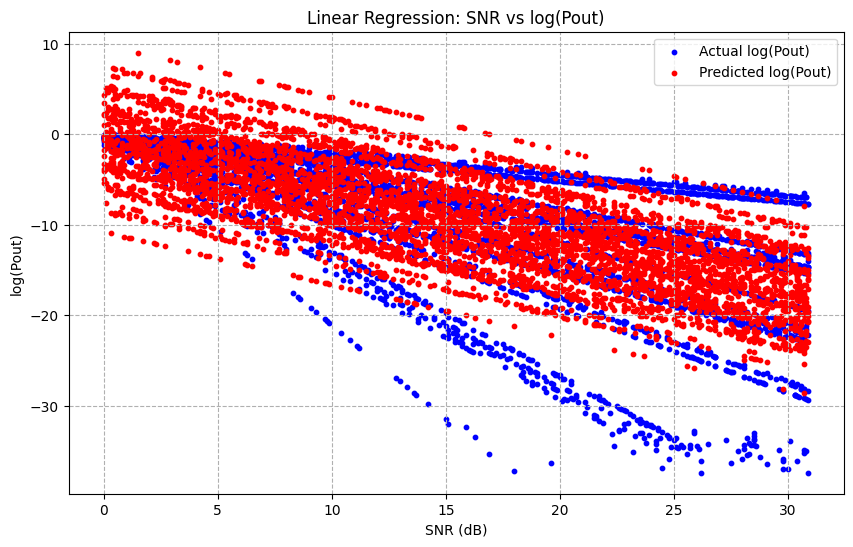

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset from the CSV file

# Define the features (X) and the log-scaled target (y)
# Ptdb  Na  K  ma  mb      Pout
X = data[['Ptdb', 'Na', 'K', 'ma', 'mb']].values  # Feature: SNR values
y = np.log(data['Pout'].values)  # Log-scaled target: log(Pout) values
print(X, y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)

# Evaluate the model's performance on the training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)



# Print the performance metrics
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

# Plotting the results (SNR vs actual and predicted log(Pout))
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,0], y_test, color='blue', s=10, label='Actual log(Pout)')
plt.scatter(X_test[:,0], y_test_pred, color='red', s=10, label='Predicted log(Pout)')

plt.xlabel('SNR (dB)')
plt.ylabel('log(Pout)')
plt.title('Linear Regression: SNR vs log(Pout)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


# above linear regression output has fatal flaw whihc is it is predicting Pout greater than 0(logged output) also The dataset does not contain any value greater than 0

In [31]:
y = np.log(data['Pout'].values)


print(np.sum(y>0), np.sum(y_train_pred>0), np.sum(y_train_pred<0))
y,  np.exp(y), data['Pout'].values

0 1712 18139


(array([ -0.07442527,  -0.07626456,  -0.07629413, ..., -22.78297995,
        -23.07064421, -23.0706953 ]),
 array([9.28276840e-01, 9.26571040e-01, 9.26543639e-01, ...,
        1.27490412e-10, 9.56195123e-11, 9.56146272e-11]),
 array([9.28276840e-01, 9.26571040e-01, 9.26543639e-01, ...,
        1.27490412e-10, 9.56195123e-11, 9.56146272e-11]))

Epoch 1/20
497/497 [==============================] - 2s 2ms/step - loss: 20.7155 - mae: 2.6579 - val_loss: 1.9029 - val_mae: 1.0528
Epoch 2/20
497/497 [==============================] - 1s 1ms/step - loss: 1.4268 - mae: 0.7734 - val_loss: 0.9135 - val_mae: 0.6394
Epoch 3/20
497/497 [==============================] - 1s 1ms/step - loss: 1.0577 - mae: 0.6563 - val_loss: 0.6048 - val_mae: 0.4872
Epoch 4/20
497/497 [==============================] - 1s 1ms/step - loss: 0.7945 - mae: 0.5546 - val_loss: 3.4544 - val_mae: 1.2283
Epoch 5/20
497/497 [==============================] - 1s 1ms/step - loss: 0.6877 - mae: 0.5107 - val_loss: 0.7158 - val_mae: 0.5395
Epoch 6/20
497/497 [==============================] - 1s 1ms/step - loss: 0.5215 - mae: 0.4350 - val_loss: 0.3198 - val_mae: 0.3278
Epoch 7/20
497/497 [==============================] - 1s 1ms/step - loss: 0.5852 - mae: 0.4657 - val_loss: 0.3180 - val_mae: 0.3141
Epoch 8/20
497/497 [==============================] - 1s 1ms/step - loss: 0

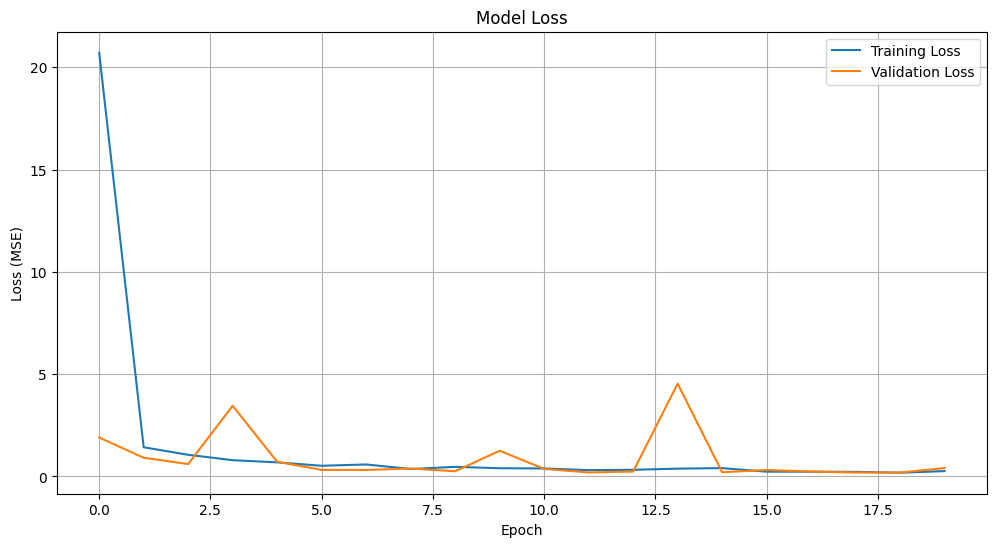

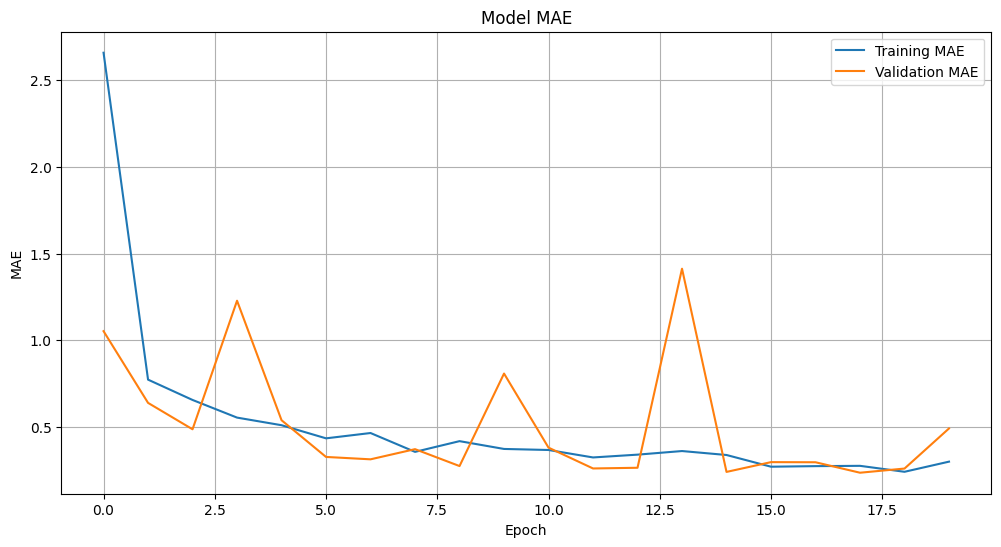

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df= data

# Define the features (X) and the log-scaled target (y)
X = df[['Ptdb', 'Na', 'K', 'ma', 'mb']].values  # Feature: SNR values
y = np.log(df['Pout'].values)  # Log-scaled target: log(Pout) values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with no activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with validation
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test).flatten()
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the test performance metrics
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Optionally, you can also plot MAE (Mean Absolute Error) if interested
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [33]:
# Evaluate the model on the training set
y_train_pred = model.predict(X_train).flatten()
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R2 Score: {r2_train}")

# Print the test performance metrics
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

621/621 [==============================] - 0s 712us/step
Training Mean Squared Error: 0.3748842938522534
Training R2 Score: 0.993550975782712
Test Mean Squared Error: 0.3601523386383485
Test R^2 Score: 0.9935426616895788


In [34]:
np.exp(model.predict([[20, 2, 5, 2, 5]]).flatten()), calculate_outage_probability(20,2,7,2,7)

1/1 [==============================] - 1s 1s/step


(array([9.247592e-06], dtype=float32), 1.749125844163757e-15)

In [35]:
num_samples = 7
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[indices]
y_sample_actual = y_test[indices]

# Predict the values using the trained model
y_sample_pred = model.predict(X_sample).flatten()

# Convert the log-scaled predictions and actual values back to the original scale
y_sample_actual_original = np.exp(y_sample_actual)
y_sample_pred_original = np.exp(y_sample_pred)

# Output the inputs (SNR values) and the corresponding predicted and actual outputs
print(f"Input SNR values (dB): {X_sample.flatten().tolist()}")
print(f"Predicted Pout values: {y_sample_pred_original.tolist()}")
print(f"Actual Pout values: {y_sample_actual_original.tolist()}")

1/1 [==============================] - 0s 17ms/step
Input SNR values (dB): [2.6, 2.0, 1.0, 3.0, 2.0, 0.1, 2.0, 3.0, 3.0, 2.0, 5.4, 2.0, 2.0, 3.0, 1.0, 15.0, 1.0, 2.0, 2.0, 2.0, 30.5, 2.0, 3.0, 1.0, 2.0, 21.6, 3.0, 2.0, 3.0, 1.0, 15.3, 2.0, 2.0, 1.0, 2.0]
Predicted Pout values: [0.4226873517036438, 0.6414331793785095, 0.05747687444090843, 0.002710399217903614, 8.93297169568541e-07, 3.7583271478069946e-05, 0.0007370214443653822]
Actual Pout values: [0.2880160079948145, 0.5077680954450305, 0.03590888597761344, 0.0025023568135542616, 5.027168676732078e-07, 1.5173682636370867e-05, 0.000557870372268787]


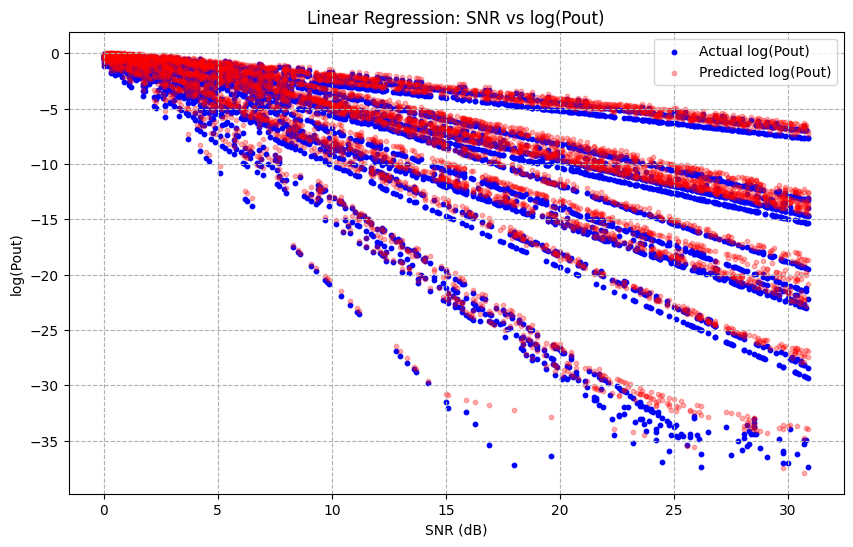

In [36]:
# Plotting the results (SNR vs actual and predicted log(Pout))
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,0], y_test, color='blue', s=10, label='Actual log(Pout)')
plt.scatter(X_test[:,0], y_test_pred, color='red', alpha=0.3, s=10, label='Predicted log(Pout)')

plt.xlabel('SNR (dB)')
plt.ylabel('log(Pout)')
plt.title('Linear Regression: SNR vs log(Pout)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

## checking on the values needed to plot that matlab plot

In [37]:
data.head(), data.tail(), data.shape

(   Ptdb  Na  K  ma  mb      Pout
 0   0.0   1  1   1   1  0.928277
 1   0.0   1  1   1   2  0.926571
 2   0.0   1  1   1   3  0.926544
 3   0.0   1  1   2   1  0.942775
 4   0.0   1  1   2   2  0.945432,
        Ptdb  Na  K  ma  mb          Pout
 25101  30.9   3  3   1   1  2.231496e-10
 25102  30.9   3  3   1   2  1.274892e-10
 25103  30.9   3  3   1   3  1.274904e-10
 25104  30.9   3  3   2   1  9.561951e-11
 25107  30.9   3  3   3   1  9.561463e-11,
 (24814, 6))

In [38]:
ptdb_values = np.arange(0, 31, 5)

# Define the constant values for Na, K, ma, mb
Na = 1
K = 1
ma = 1
mb = 1

# Generate the array to feed the model
input_array = np.array([[ptdb, Na, K, ma, mb] for ptdb in ptdb_values])

In [39]:
predict_matlab = model.predict(input_array)

np.exp(predict_matlab).flatten()

1/1 [==============================] - 0s 16ms/step


array([0.98248523, 0.5452788 , 0.23052715, 0.07503271, 0.02211016,
       0.00743194, 0.00217449], dtype=float32)

In [40]:
ptdb_values = np.arange(0, 31, 5)

# Define the constant values for Na, K, ma, mb
ma = 1
mb = 1
K = 3
Na = 3

actual = []
for ptdb in ptdb_values:
    actual.append(calculate_outage_probability(ptdb, ma, Na, mb, K))
# Generate the array to feed the model
input_array = np.array([[ptdb, Na, K, ma, mb] for ptdb in ptdb_values])

actual

[0.38638813927538457,
 0.016978651076235737,
 0.0004533805934993362,
 1.3457420726439898e-05,
 4.183272961408302e-07,
 1.3162231747790084e-08,
 4.155800146510292e-10]

In [41]:
predict_matlab = model.predict(input_array)

np.exp(predict_matlab).flatten(), ma, Na, mb, K

1/1 [==============================] - 0s 17ms/step


(array([4.3548954e-01, 2.7277185e-02, 7.0853485e-04, 2.0236406e-05,
        7.2508965e-07, 2.1224453e-08, 1.3659116e-09], dtype=float32),
 1,
 3,
 1,
 3)

In [42]:
import time

num_samples = 7
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[indices]
y_sample_actual = y_test[indices]

# Predict the values using the trained model
X_subset = X_sample[:10000]

# Start time measurement
start_time = time.time()

# Perform prediction
y_sample_pred = model.predict(X_subset).flatten()

# End time measurement
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken for prediction on 1000 samples: {time_taken:.4f} seconds")

# Convert the log-scaled predictions and actual values back to the original scale
y_sample_actual_original = np.exp(y_sample_actual)
y_sample_pred_original = np.exp(y_sample_pred)

# Output the inputs (SNR values) and the corresponding predicted and actual outputs
print(f"Input SNR values (dB): {X_sample.flatten().tolist()}")
print(f"Predicted Pout values: {y_sample_pred_original.tolist()}")
print(f"Actual Pout values: {y_sample_actual_original.tolist()}")

1/1 [==============================] - 0s 15ms/step
Time taken for prediction on 1000 samples: 0.0472 seconds
Input SNR values (dB): [26.5, 2.0, 1.0, 3.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 6.800000000000001, 2.0, 1.0, 1.0, 1.0, 14.200000000000001, 2.0, 3.0, 1.0, 2.0, 6.5, 2.0, 3.0, 1.0, 3.0, 28.400000000000002, 1.0, 1.0, 1.0, 1.0, 9.4, 3.0, 1.0, 2.0, 1.0]
Predicted Pout values: [1.8603834917030326e-08, 0.892758846282959, 0.20562249422073364, 0.0012809468898922205, 0.05337941646575928, 0.0030972349923104048, 0.0932183563709259]
Actual Pout values: [9.001599354796485e-09, 0.795146631440434, 0.16624552620960273, 0.0009191497130350034, 0.032599606621743986, 0.0024538567012328824, 0.06588520023940347]
